In [1]:
import pandas as pd
import numpy as np
import scipy.stats as s

In [2]:
data=pd.read_csv("data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.drop(labels=[data.columns[0],data.columns[32]],axis=1,inplace=True)

In [5]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
diagnosis_unique_values=data['diagnosis'].unique()

In [7]:
radius_mean_unique_values=data['radius_mean'].unique()

In [8]:
diagnosis_unique_values

array(['M', 'B'], dtype=object)

In [9]:
radius_mean_unique_values

array([17.99 , 20.57 , 19.69 , 11.42 , 20.29 , 12.45 , 18.25 , 13.71 ,
       13.   , 12.46 , 16.02 , 15.78 , 19.17 , 15.85 , 13.73 , 14.54 ,
       14.68 , 16.13 , 19.81 , 13.54 , 13.08 ,  9.504, 15.34 , 21.16 ,
       16.65 , 17.14 , 14.58 , 18.61 , 15.3  , 17.57 , 18.63 , 11.84 ,
       17.02 , 19.27 , 16.74 , 14.25 , 13.03 , 14.99 , 13.48 , 13.44 ,
       10.95 , 19.07 , 13.28 , 13.17 , 18.65 ,  8.196, 12.05 , 13.49 ,
       11.76 , 13.64 , 11.94 , 18.22 , 15.1  , 11.52 , 19.21 , 14.71 ,
       13.05 ,  8.618, 10.17 ,  8.598,  9.173, 12.68 , 14.78 ,  9.465,
       11.31 ,  9.029, 12.78 , 18.94 ,  8.888, 17.2  , 13.8  , 12.31 ,
       16.07 , 13.53 , 18.05 , 20.18 , 12.86 , 11.45 , 13.34 , 25.22 ,
       19.1  , 12.   , 18.46 , 14.48 , 19.02 , 12.36 , 14.64 , 14.62 ,
       15.37 , 13.27 , 13.45 , 15.06 , 20.26 , 12.18 ,  9.787, 11.6  ,
       14.42 , 13.61 ,  6.981,  9.876, 10.49 , 13.11 , 11.64 , 22.27 ,
       11.34 ,  9.777, 12.63 , 14.26 , 10.51 ,  8.726, 11.93 ,  8.95 ,
      

In [10]:
len(diagnosis_unique_values)

2

In [11]:
len(radius_mean_unique_values)

456

In [12]:
def determine_random_variable_type(column_name):
    if(type(data[column_name])==str or type(data[column_name])==int) and (len(data[column_name].unique())<len(data[column_name])):
        return 'discrete'
    else:
        return 'continous'
        

Parameters are as follows:
\begin{equation}
\mu,\sigma
\end{equation}

Best estimator of population parameter,
\begin{equation}
\sigma (mode)
\end{equation}

Log likelihood function is evaluated as:
\begin{equation}
\log_e L(\mu,\sigma) = \log_e P(X=x_1\cap X=x_2\cap .........X=x_N)
\end{equation}
For Normal Distribution


\begin{equation}
\log_e L(\mu, \sigma) = \log_e\prod\limits_{i=0}^{N}\left(\frac{1}{\sqrt{2\pi}\sigma}e^\frac{(x_i-\mu)^2}{2\sigma^2}\right)
\end{equation}

Now take derivative
\begin{equation}
\frac{\partial\log_e L(\mu, \sigma)}{\partial\mu} = 0
\end{equation}

\begin{equation}
\frac{\partial log_e L(\mu, \sigma)}{\partial\sigma} = 0
\end{equation}

We get
\begin{equation}
\mu_\text{best,normal} = \frac{\sum\limits_{i=0}^{N}{X_i}}{N}
\end{equation}

And, 

\begin{equation}
\sigma_\text{best,normal} = \sqrt{\frac{\sum\limits_{i=0}^{N}{(x_i-\mu_\text{best})^2}}{N}}
\end{equation}


Therefore, the maximized values of Log Likelihood Function for the case of both the probability distributions is given by:

\begin{equation}
L_\text{max,normal} = \log_e L(\mu_\text{best,normal},\sigma_\text{best,normal})
\end{equation}


For Normal Distribution

\begin{equation}
L_\text{max,normal} = \sum\limits_{i=0}^{569}\log_e\left(\frac{1}{\sqrt{2\pi}\sigma_\text{best,normal}}e^\frac{(x_i-\mu_\text{best,normal})^2}{2\sigma_\text{best,normal}^2}\right)
\end{equation}


Maximized value of Log Likelihood Function for Rayleigh Distribution can be calculated as we have just calculated for Normal Distribution. 
\begin{equation}
L_\text{max,rayleigh} = \log_e L(\sigma_\text{best,rayleigh})
\end{equation}

In [13]:
def log_like_normal(column_name):
    mu_cap=data[column_name].mean()
    sigma_cap=data[column_name].std()
    return np.sum(s.norm.logpdf(data[column_name],loc=mu_cap,scale=sigma_cap))

In [14]:
def log_like_rayleigh(column_name):
    sigma_cap=np.sqrt(data[column_name].apply(lambda x:x**2).mean()/2)
    return np.sum(s.rayleigh.logpdf(data[column_name],scale=sigma_cap))

In [15]:
def determine_distribution_type(column_name):
    if len(data[column_name].unique())==2 and type(data[column_name].iloc[0])==str:
        return 'Binomial'
    elif len(data[column_name].unique()) > 2 and len(data[column_name].unique()) < len(data[column_name]) and type(data[column_name].iloc[0]) == str:
        return 'Multinomial'
    else:
        if log_like_normal(column_name)>log_like_rayleigh(column_name):
            return 'Normal'
        else:
            return 'Rayleigh'

In [16]:
Distributions={}

for single_column in data.columns:
    Distributions[single_column]=determine_distribution_type(single_column)
    

In [17]:
Distributions

{'diagnosis': 'Binomial',
 'radius_mean': 'Normal',
 'texture_mean': 'Normal',
 'perimeter_mean': 'Normal',
 'area_mean': 'Rayleigh',
 'smoothness_mean': 'Normal',
 'compactness_mean': 'Rayleigh',
 'concavity_mean': 'Normal',
 'concave points_mean': 'Normal',
 'symmetry_mean': 'Normal',
 'fractal_dimension_mean': 'Normal',
 'radius_se': 'Rayleigh',
 'texture_se': 'Rayleigh',
 'perimeter_se': 'Rayleigh',
 'area_se': 'Rayleigh',
 'smoothness_se': 'Rayleigh',
 'compactness_se': 'Rayleigh',
 'concavity_se': 'Normal',
 'concave points_se': 'Normal',
 'symmetry_se': 'Normal',
 'fractal_dimension_se': 'Rayleigh',
 'radius_worst': 'Normal',
 'texture_worst': 'Normal',
 'perimeter_worst': 'Normal',
 'area_worst': 'Rayleigh',
 'smoothness_worst': 'Normal',
 'compactness_worst': 'Rayleigh',
 'concavity_worst': 'Normal',
 'concave points_worst': 'Normal',
 'symmetry_worst': 'Normal',
 'fractal_dimension_worst': 'Normal'}

In [18]:
import matplotlib.pyplot as plt

In [19]:
column_names_array=np.array(list(Distributions.keys()))

In [20]:
column_names_array=column_names_array[1:]

In [21]:
column_names_array=column_names_array.reshape(6,5)

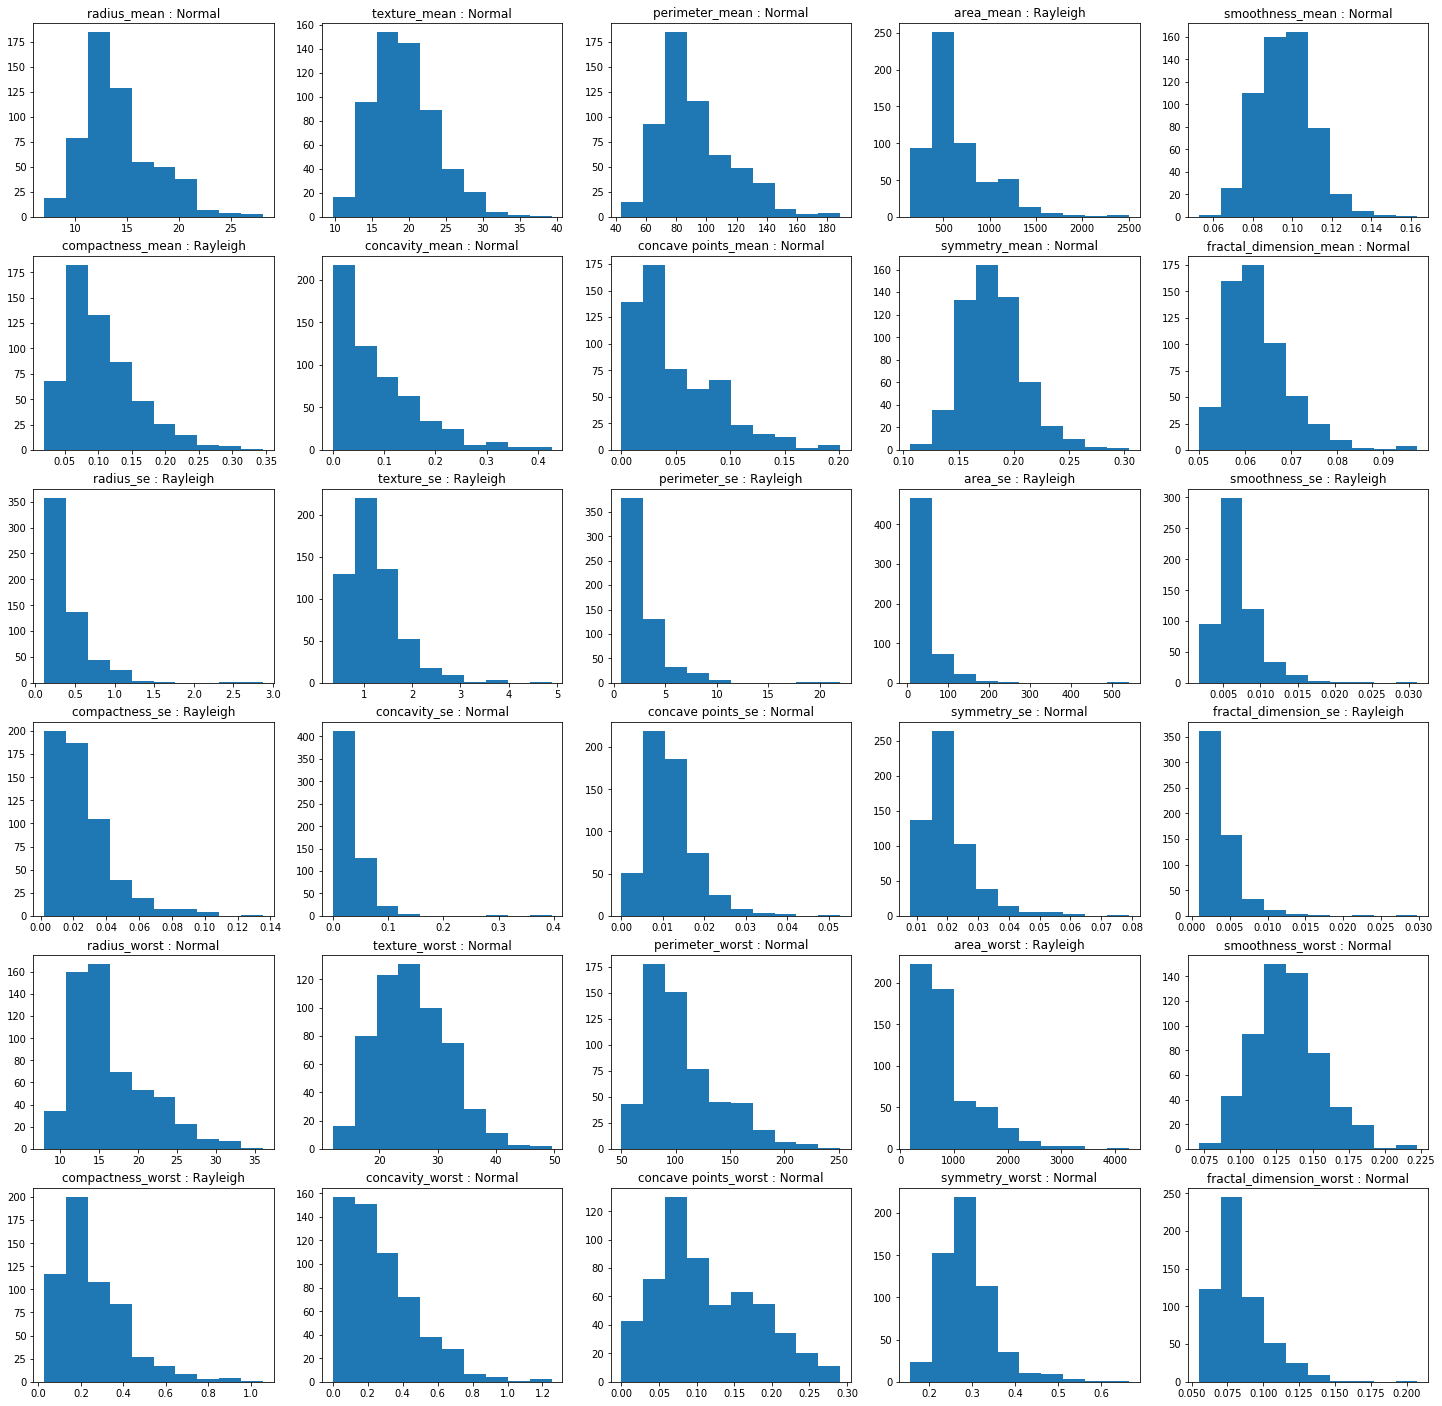

In [22]:
fig,axes=plt.subplots(6,5,figsize=(25,25))
for i in range(0,6):
    for j in range(0,5):
        axes[i,j].hist(data[column_names_array[i,j]])
        axes[i,j].set_title(column_names_array[i,j]+" : "+Distributions[column_names_array[i,j]])